# EQUITY CLIQUET OPTION

Valuation and Risk of Equity Cliquet Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

# Cliquet Option

I create a cliquet option

In [3]:
start_dt = Date(1,1, 2020)

In [4]:
expiry_dt = Date(1, 1, 2025)

In [5]:
opt_typeCall = OptionTypes.EUROPEAN_CALL

In [6]:
freq_type = FrequencyTypes.ANNUAL

In [7]:
cliquetCall = EquityCliquetOption(start_dt, expiry_dt, opt_typeCall, freq_type)

In [8]:
print(cliquetCall)

OBJECT TYPE: EquityCliquetOption
START DATE: 01-JAN-2020
FINAL EXPIRY DATE: 01-JAN-2025
OPTION TYPE: OptionTypes.EUROPEAN_CALL
FREQUENCY TYPE: FrequencyTypes.ANNUAL
DAY COUNT TYPE: DayCountTypes.THIRTY_E_360
CALENDAR TYPE: CalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: BusDayAdjustTypes.FOLLOWING
DATE GEN RULE TYPE: DateGenRuleTypes.BACKWARD


## Valuation

In [9]:
value_dt = Date(1, 1, 2020)

In [10]:
interest_rate = 0.10

In [11]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [12]:
dividend_yield = 0.0

In [13]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [14]:
volatility = 0.10

In [15]:
model = BlackScholes(volatility)

In [16]:
stock_prices = np.linspace(50, 150, 20)

In [17]:
values = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = cliquetCall.value(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(v)

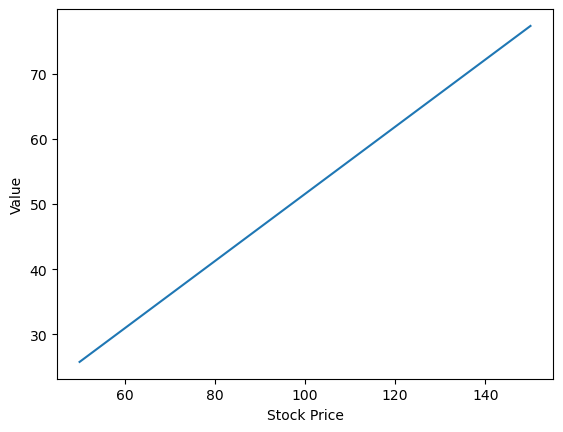

In [18]:
plt.plot(stock_prices, values)
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [19]:
cliquetCall.print_payments()

01-JAN-2021 0.9048374180359595 0.1
03-JAN-2022 0.818282256374285 0.1
02-JAN-2023 0.7406152845863752 0.1
01-JAN-2024 0.6703200460356393 0.1
01-JAN-2025 0.6065306597126334 0.1


Copyright (c) 2020 Dominic O'Kane